<a href="https://colab.research.google.com/github/fish34/sberbank_data_analysis/blob/master/hw3_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib # импортируем библиотеку
import matplotlib.pyplot as plt # основной модуль

import numpy as np # уже знакомые нам библиотеки
import pandas as pd

from pandas.plotting import register_matplotlib_converters # для корректной конвертации времени
register_matplotlib_converters() 

import seaborn as sns # наводим красоту
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'

%matplotlib inline


In [ ]:
!pip install 'matplotlib==3.4'
!pip show matplotlib 

Name: matplotlib
Version: 3.4.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: cycler, pillow, kiwisolver, pyparsing, python-dateutil, numpy
Required-by: yellowbrick, seaborn, scikit-image, pycocotools, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fbprophet, fastai, descartes, daft


### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

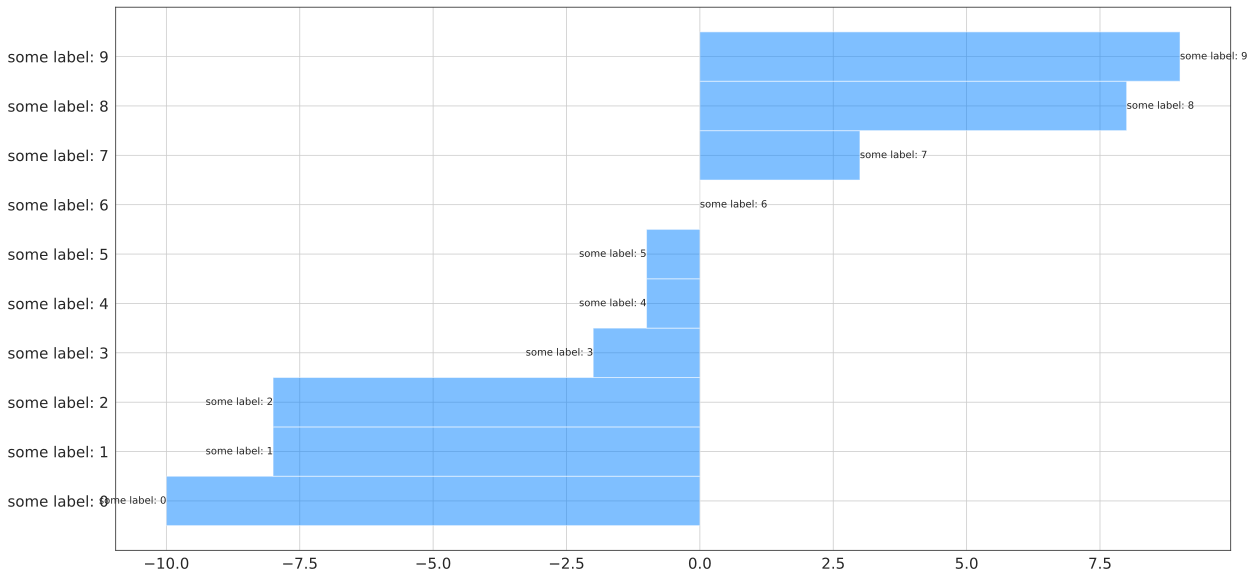

In [ ]:
# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

def plot_horizontal_bar(bar_len,labels,ylabels,figsize):
  fig=plt.figure(figsize=figsize)
  hbars=plt.barh(ylabels,bar_len,height=1,color='#0080ff',alpha=0.5)
  plt.grid(True)
  ax = plt.gca()
  ax.bar_label(hbars,labels=ylabels,label_type='edge')
  for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
  for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

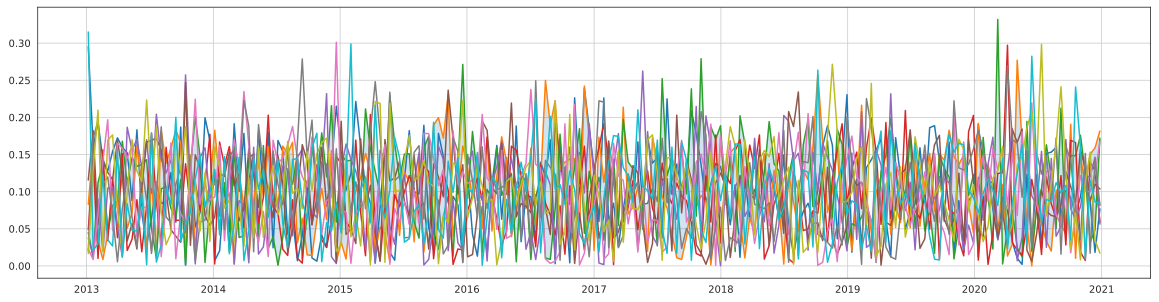

In [ ]:
# Сигнатура функции и пример вывода:

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

def plot_time_probabilities(probs, fsize):
    fig=plt.figure(figsize=figsize)
    plt.grid(True)
    plt.plot(probs,label=list(probabilities_in_time.columns))
    plt.fill_between(probs.index, probs.T.values[2],probs.T.values[1], alpha=0.2)

plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

ValueError: ignored

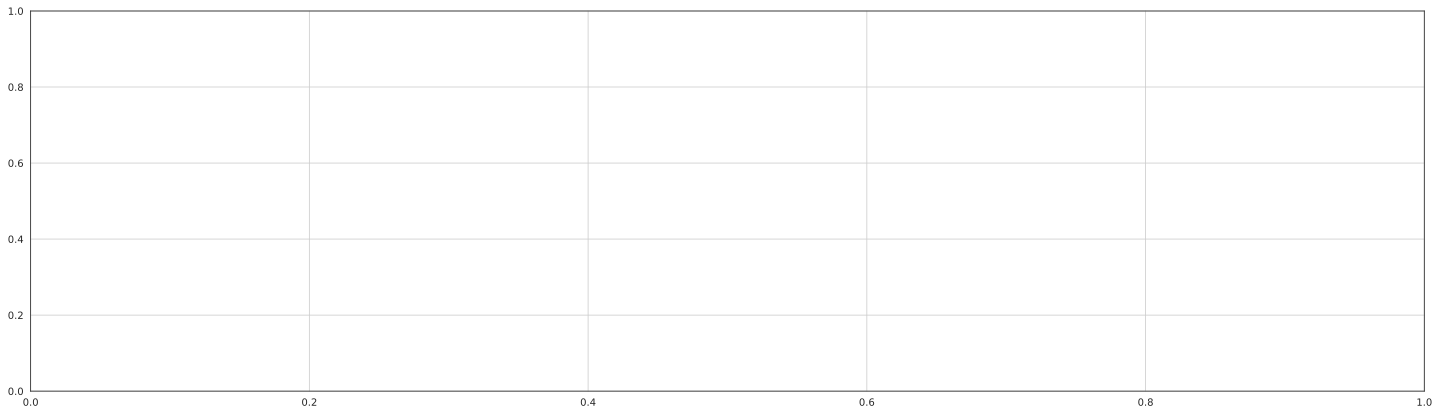

In [ ]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)

def plot_intraday_ts(ts,figsize):
  fig=plt.figure(figsize=figsize)
  plt.grid(True)
  сs = plt.pcolor(ts.values, cmap='RdBu') 
plot_intraday_ts(intraday_ts, figsize)
